In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__, keras.__version__)

2.6.0 2.6.0


In [ ]:
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units=4, input_shape = (3,), 
                       activation = "sigmoid")) # 4 units in Hidden layer
model.add(layers.Dense(units = 4, activation = "sigmoid"))
model.add(layers.Dense(units = 1, activation = "sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
"""
Input = 3
H1 = 4 Neurons
Parameters = Input * Number of Neurons in a Hidden Layer + Number of Neurons in a Hidden Layer
            = Weights + Bias

H1_p = 3 * 4 + 4 = 16


Layer _2 :
H1 - 4 Inputs
H2 = 4 Neurons

Parameters = 4*4 + 4 = 20

Ouput Layer:
Inputs = 4
O/P = 1

Parameters = 4 * 1 + 1 = 4+1 = 5

"""

'\nInput = 3\nH1 = 4 Neurons\nParameters = Input * Number of Neurons in a Hidden Layer + Number of Neurons in a Hidden Layer\n            = Weights + Bias\n\nH1_p = 3 * 4 + 4 = 16\n\n\nLayer _2 :\nH1 - 4 Inputs\nH2 = 4 Neurons\n\nParameters = 4*4 + 4 = 20\n\nOuput Layer:\nInputs = 4\nO/P = 1\n\nParameters = 4 * 1 + 1 = 4+1 = 5\n\n'

In [ ]:
#Verify the total number of parameters in a network

In [ ]:
#Compile the model
#Optimizer, Loss & Metrics
model.compile(optimizer = "SGD",
             loss = "mean_squared_error",
             metrics = ["accuracy"])

In [ ]:
#Get Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

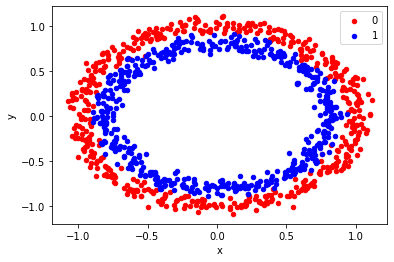

In [ ]:
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.05)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [ ]:
#Split the data
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.1,random_state = 10, stratify=y)

#### Creating the model matching our data

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units=4, input_shape = (2,),  # 2 features
                       activation = "sigmoid")) # 4 units in Hidden layer
model.add(layers.Dense(units = 4, activation = "sigmoid"))
model.add(layers.Dense(units = 1, activation = "sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile the model
#Optimizer, Loss & Metrics
model.compile(optimizer = "RMSprop",
             loss = "mean_squared_error",
             metrics = ["accuracy"])

In [ ]:
#Training of Deep Neural Network
history = model.fit(X_train,Y_train,
                   epochs = 1000,
                   validation_data = (X_test,Y_test))

In [ ]:
#Getting the history object keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

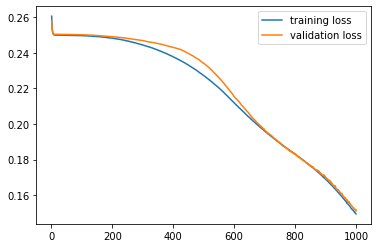

In [ ]:
plt.plot(np.arange(1,1001),history.history["loss"],label="training loss")
plt.plot(np.arange(1,1001),history.history["val_loss"],label="validation loss")
plt.legend()
plt.show()

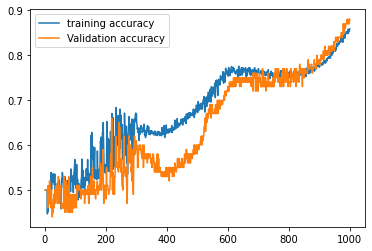

In [ ]:
plt.plot(np.arange(1,1001),history.history["accuracy"],label="training accuracy")
plt.plot(np.arange(1,1001),history.history["val_accuracy"],label="Validation accuracy")
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test

In [ ]:
y_pred_test = (model.predict(X_test) > 0.5).astype("int32")
y_pred_test

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred_test)

0.88

In [ ]:
'''
5 Step Process:
1. Prepare the Data
2. Split the data into two parts
3. Define the Model - Number of units & Total number of layers with input shape
4. Configure the Learning - using compile
5. Fit the data to Model
'''